In [1]:
cd ..

/home/wesg/research/ordinal-probing


In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import torch
from scipy.stats import rankdata
import seaborn as sns

from feature_datasets.common import *
import utils
import os

from probe_experiment import load_probe_results
from analysis.generalization import*
from analysis.probe_plots import *

%matplotlib inline

In [3]:
experiment_name = 'test_refactor'
entity_type = 'world_place'
feature_name = 'coords'

models = ['Llama-2-7b-hf', 'Llama-2-13b-hf', 'Llama-2-70b-hf']
prompts = ['empty', 'describe', 'where_is', 'coords']

rdf = make_result_df(models, prompts, experiment_name, entity_type, feature_name)

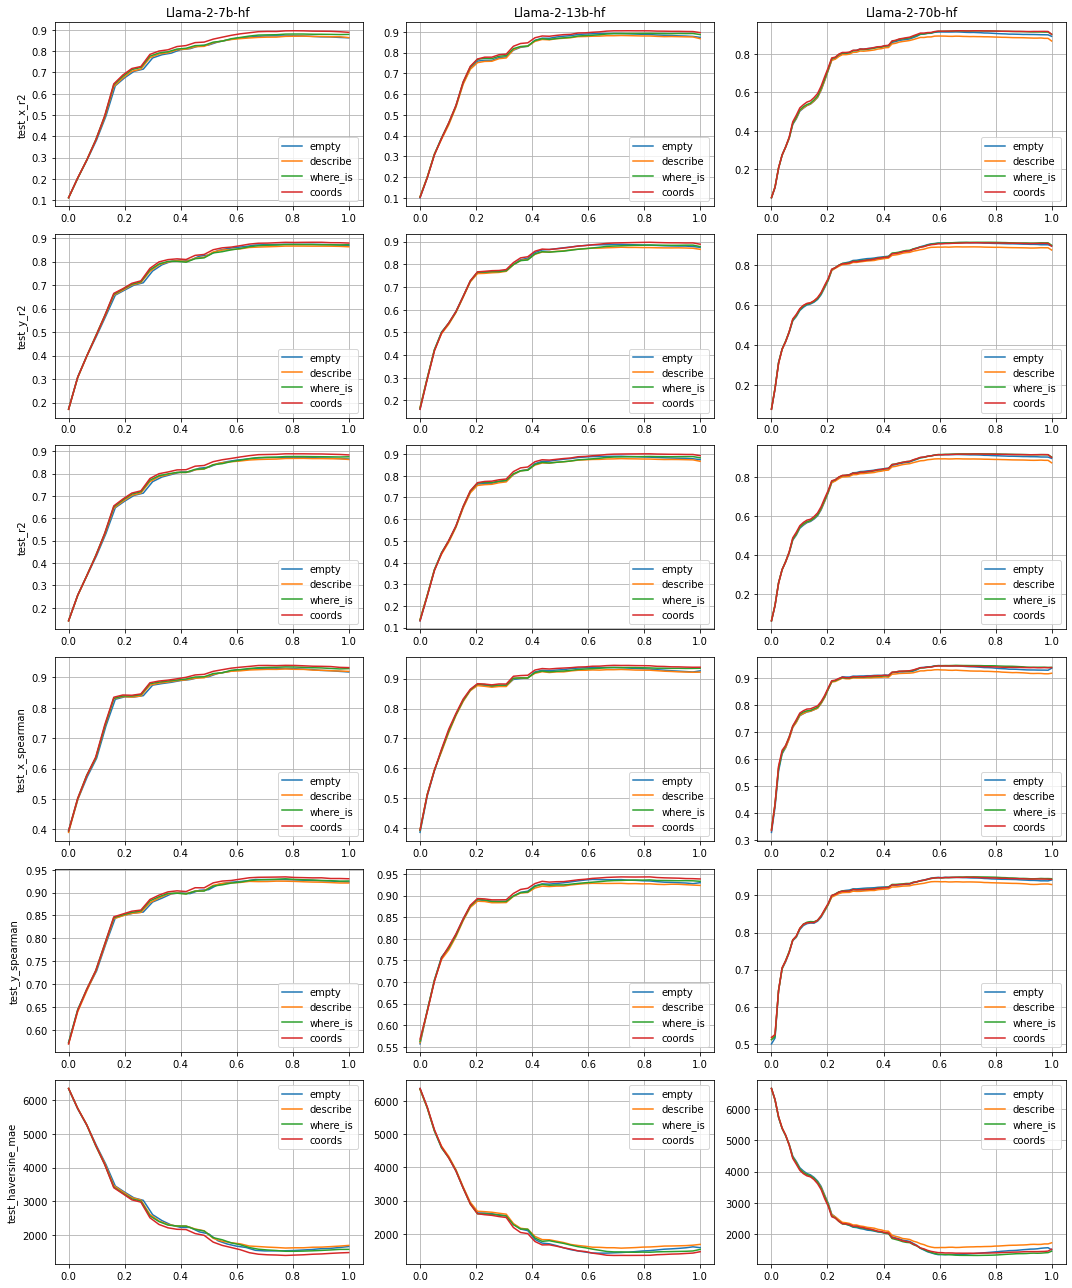

In [4]:
metrics = ['test_x_r2', 'test_y_r2', 'test_r2', 'test_x_spearman', 'test_y_spearman', 'test_haversine_mae']
performance_by_model_multiple_metrics(rdf, prompts, models, metrics=metrics);

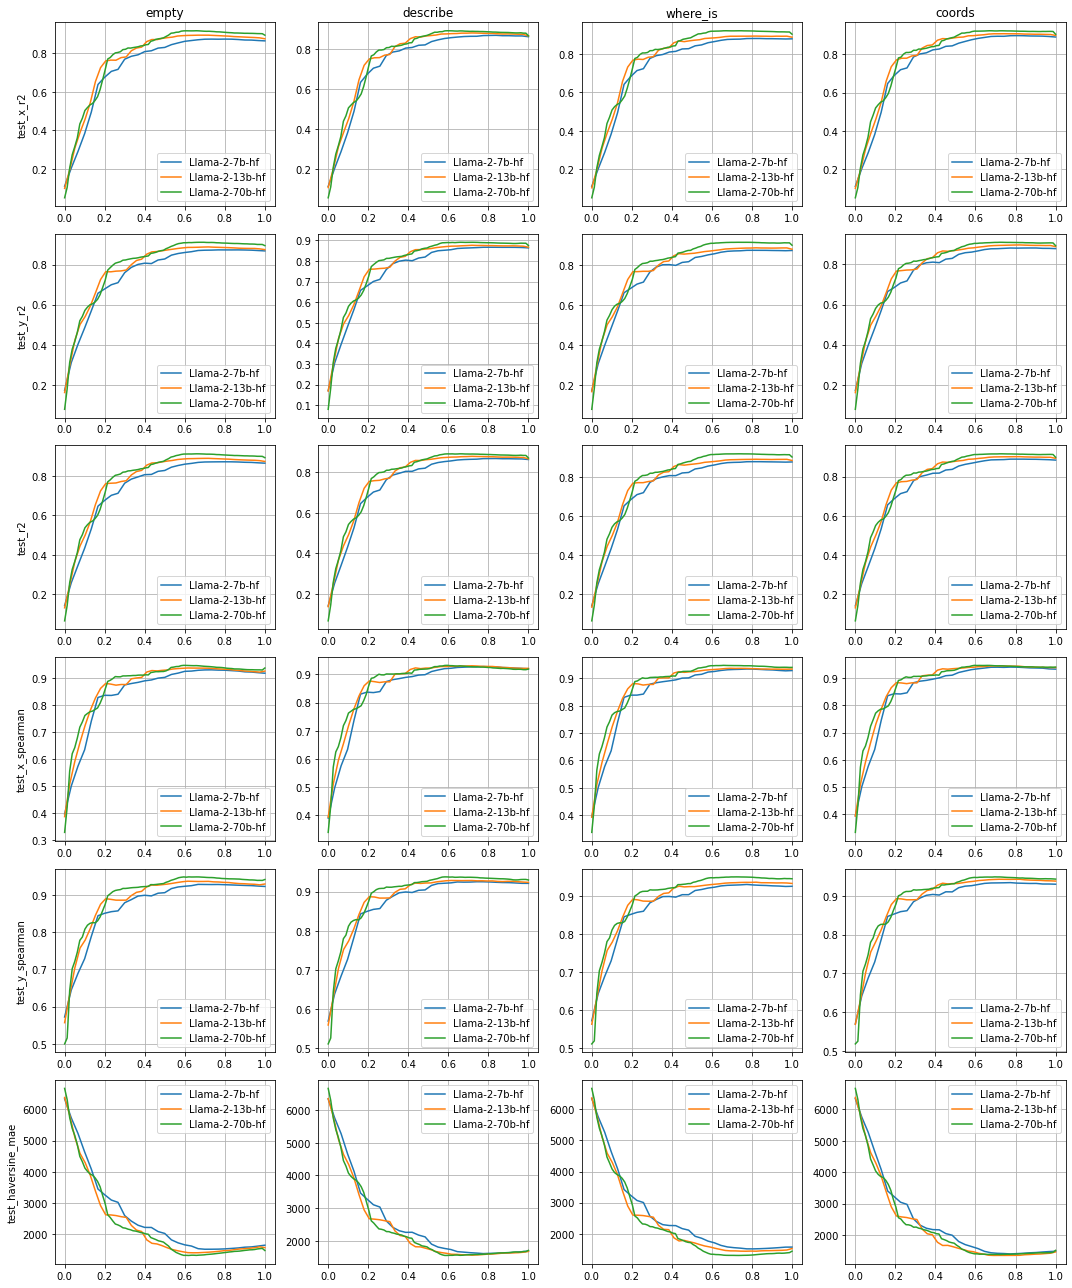

In [5]:
metrics = ['test_x_r2', 'test_y_r2', 'test_r2', 'test_x_spearman', 'test_y_spearman', 'test_haversine_mae']
performance_by_prompt_multiple_metrics(rdf, prompts, models, metrics=metrics);

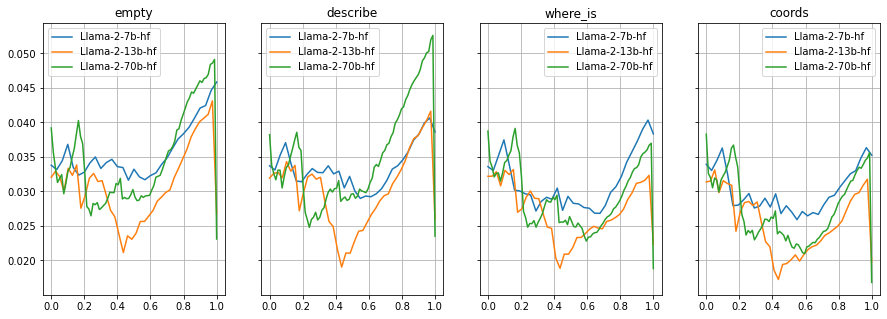

In [6]:
plot_generalization_gap(rdf, prompts, models)

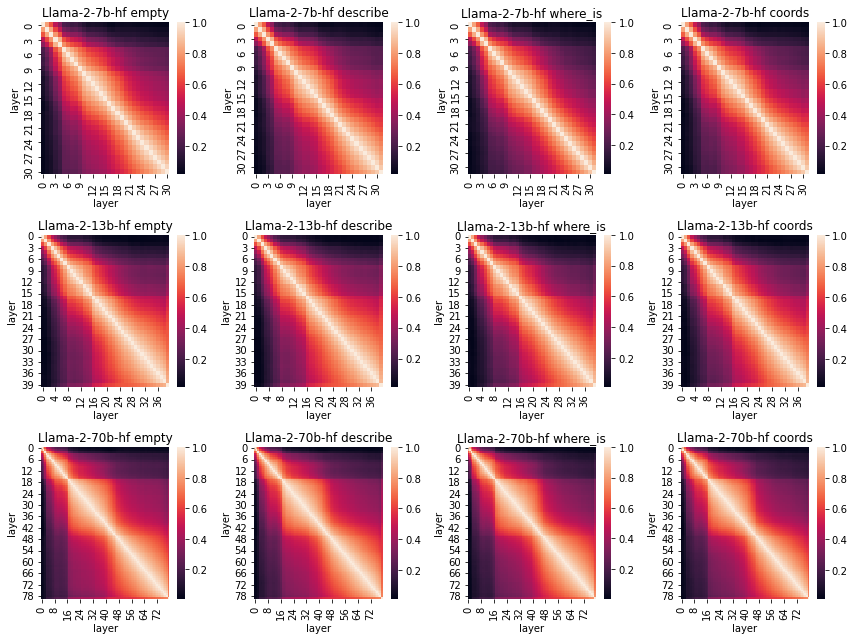

In [7]:
model_directions = make_probe_direction_matrices(models, prompts, experiment_name, entity_type, feature_name)
plot_probe_cosine_sim(model_directions, models, prompts, feature_dim=0)

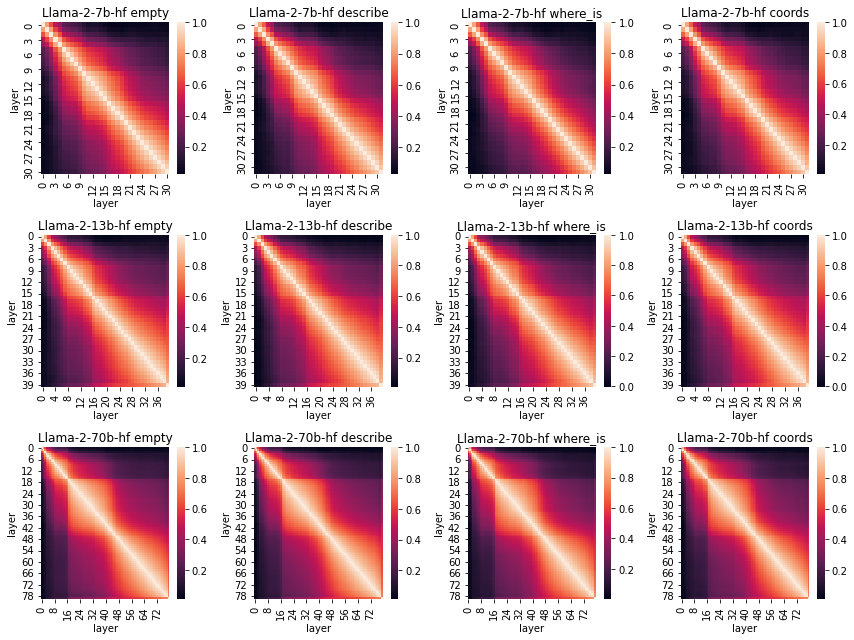

In [8]:
plot_probe_cosine_sim(model_directions, models, prompts, feature_dim=1)

In [9]:
entity_df = load_entity_data(entity_type)

In [23]:
entity_df

,name,entity_subtype,country,latitude,longitude,has_thumbnail,page_views,entity_type,total_area,population,is_test
0,Tancredo Neves Pantheon of the Fatherland and ...,Monument,Brazil,-15.80170,-47.86030,1,7521.0,structure,NaN,NaN,False
1,Sembuwatta Lake,AmusementParkAttraction,Sri_Lanka,7.43694,80.69970,1,16340.0,structure,NaN,NaN,False
2,Ford Rotunda,AmusementParkAttraction,United_States,42.31210,-83.17670,1,40773.0,structure,NaN,NaN,False
3,Afsluitdijk,Bridge,Netherlands,53.00000,5.16667,1,227321.0,structure,NaN,NaN,False
4,Mudeirej Bridge,Bridge,Lebanon,33.80080,35.72710,1,5623.0,structure,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
39580,La Poudre Pass Lake,NaturalPlace,United_States,40.47330,-105.82500,0,19310.0,natural_place,NaN,NaN,False
39581,Lac Le Jeune,NaturalPlace,Canada,50.48300,-120.47700,1,7050.0,natural_place,NaN,NaN,True
39582,Khatanga Gulf,NaturalPlace,Russia,73.75000,109.00000,1,16258.0,natural_place,NaN,NaN,True
39583,Karimata Strait,NaturalPlace,Indonesia,-2.08333,108.66700,1,32778.0,natural_place,NaN,NaN,True


In [10]:
rdf

,model,prompt,layer,train_x_r2,train_y_r2,train_r2,train_x_mae,train_y_mae,train_mae,train_mse,...,test_y_pearson,test_y_pearson_p,test_y_spearman,test_y_spearman_p,test_y_kendall,test_y_kendall_p,test_haversine_mse,test_haversine_rmse,test_haversine_mae,test_haversine_r2
0,Llama-2-7b-hf,empty,0,0.116481,0.178179,0.147330,21.502831,56.173818,38.838324,2857.842877,...,0.606978,0.0,0.572206,0.0,0.412908,0.0,5.503947e+07,7418.858973,6333.410072,0.152723
1,Llama-2-7b-hf,empty,1,0.213060,0.321308,0.267184,20.090071,50.326232,35.208151,2383.187139,...,0.644552,0.0,0.644885,0.0,0.474407,0.0,4.629174e+07,6803.803679,5724.368114,0.287386
2,Llama-2-7b-hf,empty,2,0.301525,0.415700,0.358613,18.591591,45.613190,32.102391,2060.184094,...,0.690904,0.0,0.689396,0.0,0.510814,0.0,4.027622e+07,6346.355156,5229.811524,0.379988
3,Llama-2-7b-hf,empty,3,0.397670,0.501772,0.449721,16.594774,40.097649,28.346212,1759.417232,...,0.722118,0.0,0.728882,0.0,0.547494,0.0,3.460755e+07,5882.818479,4638.654735,0.467252
4,Llama-2-7b-hf,empty,4,0.510585,0.589832,0.550208,14.340448,35.327471,24.833959,1445.849517,...,0.777606,0.0,0.788797,0.0,0.605292,0.0,2.895919e+07,5381.374465,4089.538581,0.554203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,Llama-2-70b-hf,coords,75,0.945093,0.941647,0.943370,4.152746,11.054655,7.603700,199.769163,...,0.952512,0.0,0.944468,0.0,0.815608,0.0,5.482308e+06,2341.432821,1429.767138,0.915605
603,Llama-2-70b-hf,coords,76,0.945865,0.942498,0.944181,4.143509,11.029244,7.586377,196.866125,...,0.952650,0.0,0.944223,0.0,0.814932,0.0,5.471229e+06,2339.065768,1433.585353,0.915776
604,Llama-2-70b-hf,coords,77,0.946277,0.943116,0.944696,4.139851,10.998309,7.569080,194.820206,...,0.952770,0.0,0.944211,0.0,0.814749,0.0,5.452735e+06,2335.109106,1436.570354,0.916061
605,Llama-2-70b-hf,coords,78,0.946493,0.943372,0.944932,4.149608,11.026282,7.587945,193.953454,...,0.952533,0.0,0.943898,0.0,0.813647,0.0,5.472198e+06,2339.272885,1446.515925,0.915761
